In [29]:
import numpy as np
import gym

In [30]:
env = gym.make('FrozenLake-v1')
np.set_printoptions(precision=6, suppress=True)

In [31]:
lr = 0.8
dis_f = 0.95
exp_prob = 0.3
num_episodes = 1000

In [32]:
num_states = env.observation_space.n
num_action = env.action_space.n

q_table = np.zeros((num_states, num_action))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
for _ in range(num_episodes):
    state = env.reset()[0]
    done = False
    while not done:
        if np.random.uniform(0,1) < exp_prob:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        next_state, reward, done, _, _ = env.step(action)
        q_table[state, action] = (1-lr) * q_table[state, action] + lr * (reward + dis_f * np.max(q_table[next_state, :]))
        state = next_state

/usr/local/python/3.10.4/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:237: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(truncated, (bool, np.bool8)):


In [34]:
num_eval_episodes = 10
total_reward = 0

for _ in range(num_eval_episodes):
    state = env.reset()[0]
    done = False
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        state = next_state

average_reward = total_reward / num_eval_episodes
print(f"Average rewaed over {num_eval_episodes} episodes is {average_reward}")

Average rewaed over 10 episodes is 0.1


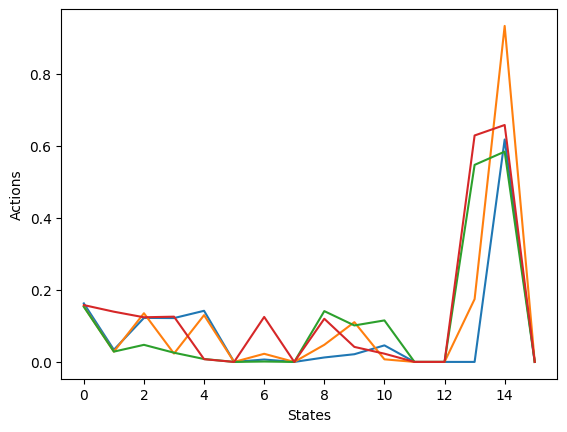

In [35]:
import matplotlib.pyplot as plt


plt.plot(q_table)
plt.xlabel("States")
plt.ylabel("Actions")
plt.show()